In [22]:
# imports
import sympy as sp
from sympy import Matrix, MatrixSymbol
sp.init_printing()
import matplotlib.pyplot as plt
import numpy as np
import mpmath

In [23]:
# constants
Lc=sp.Symbol('L_c')
Lc=1 #CHANGEABLE

In [24]:
# dimensional parameters
n=sp.Symbol('n')
n=1023 #CHANGEABLE
A=sp.Symbol('A')
A=0 #CHANGEABLE - must be greater or equal to 0
B=sp.Symbol('B')
B=75 #CHANGEABLE
S=sp.Symbol('S')
S=(B-A)/(n+1)

In [25]:
# non-dimensional parameters
a=sp.Symbol('a')
a=A/Lc
b=sp.Symbol('b')
b=B/Lc
s=sp.Symbol('s')
s=S/Lc

In [26]:
# non-dimensional grid
xi=sp.Symbol('x_i')
xi=np.linspace(a+s,b-s,n)

In [27]:
# non-dimensional Coulomb potential
v=sp.Function('v')
def V(X,l):
    return (l*(l+1))/(X**2)-2/X
vi0=sp.Symbol('v_{i0}')
vi0=V(xi,0)
vi1=sp.Symbol('v_{i1}')
vi1=V(xi,1)

In [28]:
# auxiliary variables
vit0=sp.Symbol('\widetilde{v_{i0}}')
vit0=s*s*vi0
vit1=sp.Symbol('\widetilde{v_{i1}}')
vit1=s*s*vi1

In [29]:
# hamiltonian operator
H0=sp.MatrixSymbol('H_0',n,n)
H0= -1*np.eye(n,n,k=-1) + (2+vit0)*np.eye(n,n) + -1*np.eye(n,n,k=1)
H1=sp.MatrixSymbol('H_1',n,n)
H1= -1*np.eye(n,n,k=-1) + (2+vit1)*np.eye(n,n) + -1*np.eye(n,n,k=1)

In [30]:
# eigenvalues and eigenvectors
eigval0=np.linalg.eigh(H0)[0]/(s*s)
eigvec0=np.linalg.eigh(H0)[1]
eigval1=np.linalg.eigh(H1)[0]/(s*s)
eigvec1=np.linalg.eigh(H1)[1]
(eigval0)[0],(eigval1)[0]

In [ ]:
# transpose eigvec to make an easier to use array
Psi0=eigvec0.T
Psi1=eigvec1.T

Text(0, 0.5, '$\\psi_n(x)$')

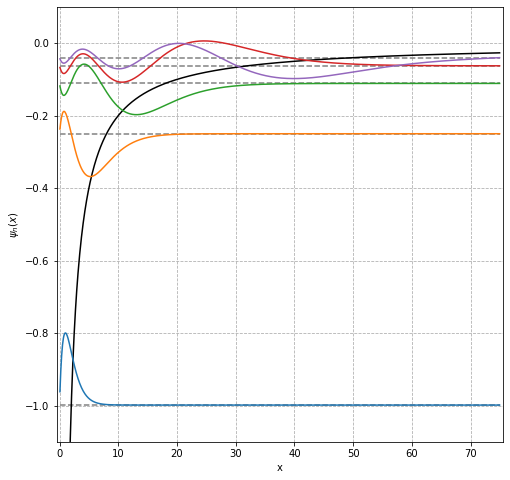

In [ ]:
# graph of Coulomb eigenstates with l=0
fig,ax=plt.subplots(figsize=(8,8))
plt.xlim(A-0.5,B+0.5)
plt.ylim(-1.1,0.1)
plt.plot(xi,vi0,color='black')
i=0
for i in range(0,5):
    if i == 0:
        plt.plot(xi,-Psi0[i]+eigval0[i])
    else: 
        if (i % 4) == 3 or (i % 4) == 0:
            plt.plot(xi,-Psi0[i]+eigval0[i])
        else:
            plt.plot(xi,Psi0[i]+eigval0[i])  
    plt.hlines(eigval0[i],A,B,color='grey',ls='--')
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi_n(x)$')

Text(0, 0.5, '$\\psi^2_n(x)$')

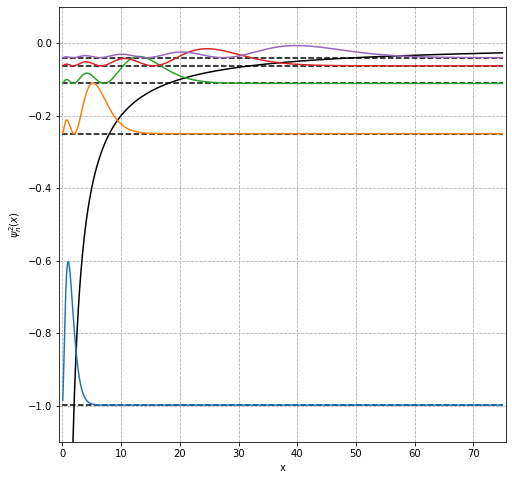

In [ ]:
# graph of Coulomb eigenstates probability densities with l=0
fig,ax=plt.subplots(figsize=(8,8))
plt.xlim(A-0.5,B+0.5)
plt.ylim(-1.1,0.1)
plt.plot(xi,vi0,color='black')
i=0
for i in range(0,5):
    plt.plot(xi,Psi0[i]**2*10+eigval0[i])
    plt.hlines(eigval0[i],A,B,color='black',ls='--')
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')

Text(0, 0.5, '$\\psi_n(x)$')

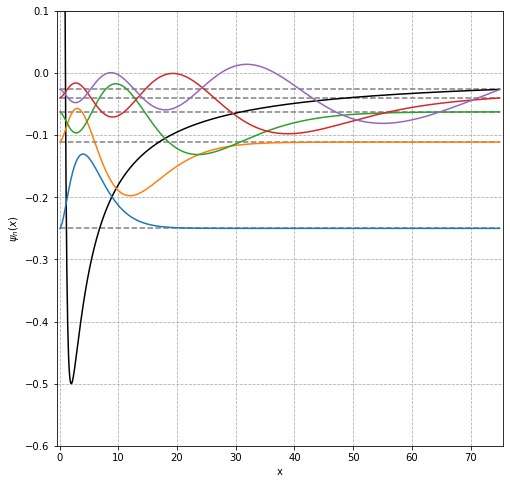

In [ ]:
# graph of Coulomb eigenstates with l=1
fig,ax=plt.subplots(figsize=(8,8))
plt.xlim(A-0.5,B+0.5)
plt.ylim(-0.6,0.1)
plt.plot(xi,vi1,color='black')
i=0
for i in range(0,5):
    if i == 0:
        plt.plot(xi,-Psi1[i]+eigval1[i])
    else: 
        if (i % 4) == 3 or (i % 4) == 0:
            plt.plot(xi,-Psi1[i]+eigval1[i])
        else:
            plt.plot(xi,Psi1[i]+eigval1[i])  
    plt.hlines(eigval1[i],A,B,color='grey',ls='--')
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi_n(x)$')

Text(0, 0.5, '$\\psi^2_n(x)$')

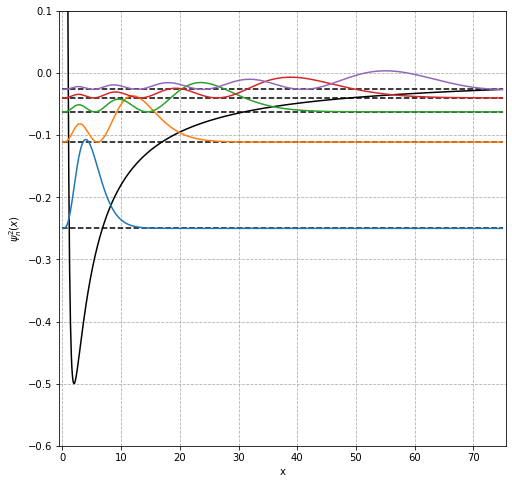

In [ ]:
# graph of Coulomb eigenstates probability densities with l=1
fig,ax=plt.subplots(figsize=(8,8))
plt.xlim(A-0.5,B+0.5)
plt.ylim(-0.6,0.1)
plt.plot(xi,vi1,color='black')
i=0
for i in range(0,5):
    plt.plot(xi,Psi1[i]**2*10+eigval1[i])
    plt.hlines(eigval1[i],A,B,color='black',ls='--')
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')